### Understanding different Venues spread in Hyderabad city using Location Data

#### Importing required libraries and methods

In [207]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import matplotlib.cm as cm
import matplotlib.colors as colors
import folium
from pandas.io.json import json_normalize
import warnings
warnings.filterwarnings('ignore')
import requests
from geopy.exc import GeocoderTimedOut 
from geopy.geocoders import Nominatim 
from collections import defaultdict
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from IPython.display import Image 
from IPython.core.display import HTML 

#### Latitude and Longitude Distributions of locations across India

Text(0.5, 0, 'Longitude')

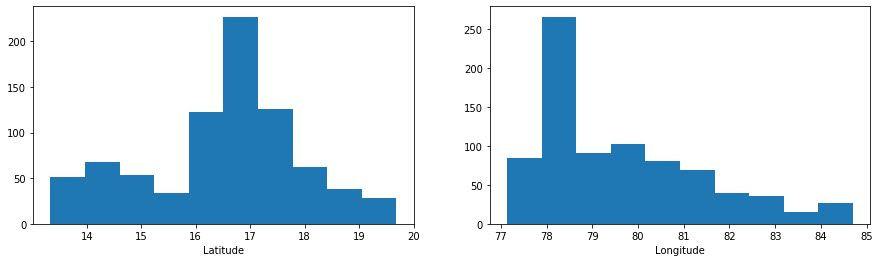

In [2]:
india_data=pd.read_csv('India_location.csv')

india_data.drop('accuracy',axis=1,inplace=True)
india_data.dropna(inplace=True)

india_data.columns=['pin','place','state','latitude','longitude']
india_data.reset_index(inplace=True)

andhra_data=india_data[india_data['state']=='Andhra Pradesh']

f,(ax1,ax2)=plt.subplots(1,2,figsize=(15,4))
ax1.hist(andhra_data.latitude)
ax1.set_xlabel('Latitude')
ax2.hist(andhra_data.longitude)
ax2.set_xlabel('Longitude')

#### The following code is for Preprocessing the Hyderabad data copied from Wikipedia and to fetch the Latitude and Longitude Values useing geopy

In [ ]:
'''
hyd=pd.read_csv('Hyderabad_Neighborhoods.csv')

hyd['Neighborhood']=hyd['Neighborhood'].str.lower().str.strip()

hyd.groupby('section').count()

longitude = [] 
latitude = [] 

def findGeocode(city):
    #print(city)
    try: 
        geolocator = Nominatim(user_agent="your_app_name")  
        return geolocator.geocode(city) 
    except GeocoderTimedOut: 
        return findGeocode(city)


y=hyd['Neighborhood'].apply(findGeocode)

nones=[]
for i,each in enumerate(y) :
    if each==None :
        nones.append(i)
        continue
    latitude.append(each.latitude)
    longitude.append(each.longitude)

hyd.drop(nones,inplace=True)

hyd['latitude']=latitude
hyd['longitude']=longitude

hyd.reset_index(inplace=True)
hyd=hyd.drop('index',axis=1)

hyd.to_csv('Hyderabad_Location_Data.csv')

'''

In [ ]:
'''
hyd=hyd[(hyd.latitude>17.2) & (hyd.latitude<17.6) & (hyd.longitude>78.2) & (hyd.longitude<78.7)]
hyd.to_csv('Hyderabad_Location_Data.csv')
'''

  Neighborhood  section   latitude  longitude
0     ameerpet  Central  17.437501  78.448251
1     begumpet  Central  17.444020  78.462482
2     sr nagar  Central  17.445231  78.444912
3   punjagutta  Central  17.426957  78.452393
4    balkampet  Central  17.446923  78.450451


Text(0.5, 0, 'Longitude')

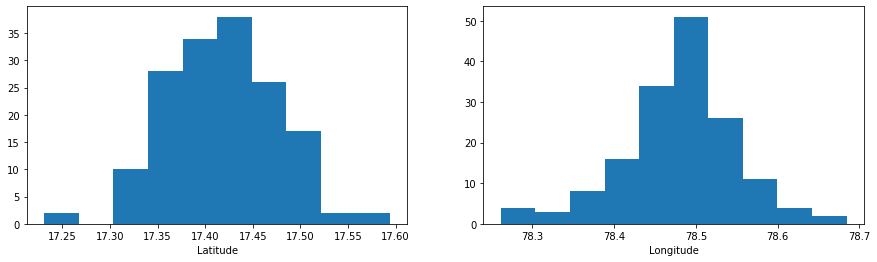

In [3]:
hyd=pd.read_csv('Hyderabad_Location_Data.csv')
print(hyd.head())

f,(ax1,ax2)=plt.subplots(1,2,figsize=(15,4))
ax1.hist(hyd.latitude)
ax1.set_xlabel('Latitude')
ax2.hist(hyd.longitude)
ax2.set_xlabel('Longitude')

In [4]:
fs_id=''
fs_secret=''
version = '20200801'
limit = 50
radius=2000

venue_dict=defaultdict(pd.DataFrame)

In [ ]:
def getVenueData(row) :
    
    hood=row['Neighborhood']
    hood_section=row['section']
    hood_lat,hood_lon=row['latitude'], row['longitude']
    
    url="https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}".\
    format(fs_id,fs_secret,version,hood_lat,hood_lon,radius,limit)
    
    result=requests.get(url).json()
    
    result_len=len(result['response']['groups'][0]['items'])
    
    neighborhood,section,city,latitude,longitude,venue_id,venue_name,venue_lat,venue_lon,venue_cat_id,venue_cat_name=\
    [],[],[],[],[],[],[],[],[],[],[]
    for i in range(result_len) :
        neighborhood.append(hood)
        section.append(hood_section)
        #city.append(result['response']['groups'][0]['items'][i]['venue']['location']['city'])
        city.append('Hyderabad')
        latitude.append(hood_lat)
        longitude.append(hood_lon)
        venue_id.append(result['response']['groups'][0]['items'][i]['venue']['id'])
        venue_name.append(result['response']['groups'][0]['items'][i]['venue']['name'])
        venue_lat.append(result['response']['groups'][0]['items'][i]['venue']['location']['lat'])
        venue_lon.append(result['response']['groups'][0]['items'][i]['venue']['location']['lng'])
        venue_cat_id.append(result['response']['groups'][0]['items'][i]['venue']['categories'][0]['id'])
        venue_cat_name.append(result['response']['groups'][0]['items'][i]['venue']['categories'][0]['name'])
        
    venue_dict[hood]=pd.DataFrame(list(zip(neighborhood,section,city,latitude,longitude,venue_id,venue_name,venue_lat,venue_lon,venue_cat_id,venue_cat_name)))
    venue_dict[hood].columns=['neighborhood','section','city','latitude','longitude',\
                                      'venue_id','venue_name','venue_lat','venue_lon','venue_cat_id','venue_cat_name']

In [ ]:
for each in hyd.iterrows() :
    print(each[0])
    getVenueData(each[1])

In [ ]:
#If the fetch fails somewhere run this by changing the start index
for each in hyd.iloc[132:].iterrows() :
    print(each[0])
    getVenueData(each[1])

In [ ]:
final=venue_dict['ameerpet'].values

for each_key in list(venue_dict.keys())[1:] :
    if len(venue_dict[each_key])==0 :
        continue
    final=np.r_[final,venue_dict[each_key].values]
    
hyd_loc_df=pd.DataFrame(final,columns=venue_dict['ameerpet'].columns)

In [ ]:
hyd_loc_df.shape

In [ ]:
hyd_loc_df

In [ ]:
hyd_loc_df[hyd_loc_df['neighborhood']=='miyapur']

In [ ]:
#hyd_loc_df.to_csv('Hyderabad_Loaction_2000radius.csv')

In [71]:
hyd_loc_df=pd.read_csv('Hyderabad_Loaction_2000radius.csv')

hyd_loc_df.drop('Unnamed: 0',axis=1,inplace=True)

hyd_loc_df.shape

(3625, 11)

In [72]:
hyd_loc_df.sample(10)

neighborhood   section       city   latitude  longitude  \
342   khairatabad   Central  Hyderabad  17.411771  78.462200   
2716   gachibowli   Western  Hyderabad  17.443622  78.351964   
359   khairatabad   Central  Hyderabad  17.411771  78.462200   
2620   yousufguda   Western  Hyderabad  17.438750  78.427987   
3289    habsiguda   Eastern  Hyderabad  17.415476  78.542692   
1175    kachiguda   Central  Hyderabad  17.390040  78.494621   
3114    old alwal  Northern  Hyderabad  17.506038  78.500727   
3036  fateh nagar  Northern  Hyderabad  17.458155  78.451337   
767     domalguda   Central  Hyderabad  17.407845  78.485000   
1820  marredpally   Central  Hyderabad  17.450794  78.504897   

                      venue_id              venue_name  venue_lat  venue_lon  \
342   4eba8f558231d54a3da13f39  Barista (Prasads Imax)  17.413033  78.465625   
2716  4c1098e56b7e2d7f0be82735                  Wonton  17.441918  78.357974   
359   507674a5e4b03a8f004afb40                  Subway  17.425549  78.457191   
2620  4c0be2f16a3bb71361a772c7         The Spicy Venue  17.435141  78.411046   
3289  4cb709ba58b6ef3bf49d280c         78 Degrees East  17.417746  78.543179   
1175  4cff665a21ea6ea817743c9f                  Subway  17.401094  78.486590   
3114  532edc01498ef6763ddec4c6       M.E.S colony park  17.497960  78.507471   
3036  4e5b27778877c8a76dfc0f0c          Vivanta by Taj  17.443498  78.460556   
767   4c4020545faf76b0ae174820     Courtyard Hyderabad  17.424329  78.486719   
1820  4c78170b83a7bfb733b476f8   blue sea tea & Snacks  17.436877  78.505008   

                  venue_cat_id      venue_cat_name  
342   4bf58dd8d48988d1e0931735         Coffee Shop  
2716  4bf58dd8d48988d145941735  Chinese Restaurant  
359   4bf58dd8d48988d1c5941735      Sandwich Place  
2620  4bf58dd8d48988d10f941735   Indian Restaurant  
3289  4bf58dd8d48988d10f941735   Indian Restaurant  
1175  4bf58dd8d48988d1c5941735      Sandwich Place  
3114  4bf58dd8d48988d163941735                Park  
3036  4bf58dd8d48988d1fa931735               Hotel  
767   4bf58dd8d48988d1fa931735               Hotel  
1820  4bf58dd8d48988d1dc931735            Tea Room

In [73]:
hyd_loc_df=hyd_loc_df.join(pd.get_dummies(hyd_loc_df.venue_cat_name))

In [74]:
hyd_loc_df.sample(5)

neighborhood        section       city   latitude  longitude  \
12         ameerpet        Central  Hyderabad  17.437501  78.448251   
2140      dabirpura       Old City  Hyderabad  17.366528  78.490124   
657   chintal basti        Central  Hyderabad  17.409679  78.457052   
2484  jubilee hills        Western  Hyderabad  17.430836  78.410288   
3353   dilsukhnagar  South Eastern  Hyderabad  17.368431  78.523428   

                      venue_id          venue_name  venue_lat  venue_lon  \
12    4cbaae4d4495721ea0be517a     Southern Mirchi  17.426419  78.448560   
2140  4e4d3c5b52b1075a6394d7cd        Hotel Sohail  17.372829  78.499298   
657   4bfc166ae9d8c9285306b2c7         PVR Cinemas  17.426516  78.453261   
2484  4d0f7bc838bb6ea8f9d6beaa  Rayalseema Ruchulu  17.431207  78.407736   
3353  4d26e5eb849f37043c4b6341     Cafe Coffee Day  17.369760  78.516115   

                  venue_cat_id  ... Supermarket  Taxi Stand  Tea Room  \
12    54135bf5e4b08f3d2429dfde  ...           0           0         0   
2140  4bf58dd8d48988d10f941735  ...           0           0         0   
657   4bf58dd8d48988d180941735  ...           0           0         0   
2484  4bf58dd8d48988d10f941735  ...           0           0         0   
3353  4bf58dd8d48988d16d941735  ...           0           0         0   

      Tech Startup  Temple  Thai Restaurant  Train Station  \
12               0       0                0              0   
2140             0       0                0              0   
657              0       0                0              0   
2484             0       0                0              0   
3353             0       0                0              0   

      Vegetarian / Vegan Restaurant  Women's Store  Zoo  
12                                0              0    0  
2140                              0              0    0  
657                               0              0    0  
2484                              0              0    0  
3353                              0              0    0  

[5 rows x 190 columns]

#### Hyderabad Neighborhoods

In [8]:
hyd_lat, hyd_lon=17.3850, 78.4867

hyd_map=folium.Map([hyd_lat, hyd_lon],zoom_start=10)

folium.CircleMarker([hyd_lat, hyd_lon],radius=10,popup='Hyderabad',fill_color='red',fill_opacity=5,parse_html=True).add_to(hyd_map)

for lat,lon,pop in hyd[['latitude','longitude','Neighborhood']].values :
    folium.CircleMarker([lat,lon],radius=5,popup=str(pop)+'\n {},{}'.format(str(lat),str(lon)),fill_color='black',fill_opacity=0.5,parse_html=True).add_to(hyd_map)

hyd_map

#### Hyderabad Venues Distribution

In [9]:
hyd_lat, hyd_lon=17.3850, 78.4867

hyd_map=folium.Map([hyd_lat, hyd_lon],zoom_start=12)

folium.CircleMarker([hyd_lat, hyd_lon],radius=10,popup='Hyderabad',fill_color='red',fill_opacity=5,parse_html=True).add_to(hyd_map)

for lat,lon,pop in hyd_loc_df[['venue_lat','venue_lon','venue_name']].values :
    folium.CircleMarker([lat,lon],radius=3,popup=str(pop)+'\n {},{}'.format(str(lat),str(lon)),fill_color='black',fill_opacity=0.2,parse_html=True).add_to(hyd_map)

hyd_map

Text(0.5, 1.0, 'Distribution of Venues over Categories')

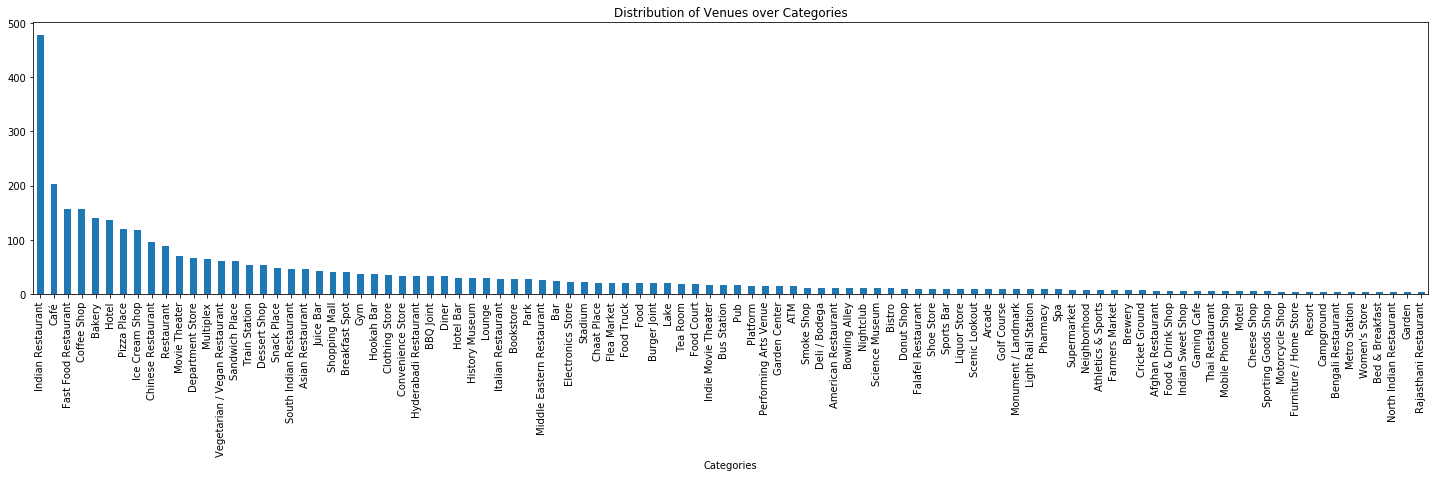

In [10]:
plt.figure(figsize=(25,5))
hyd_loc_df.venue_cat_name.value_counts()[:100].plot(kind='bar')
plt.xlabel('Categories')
plt.title('Distribution of Venues over Categories')

Text(0.5, 0, 'K')

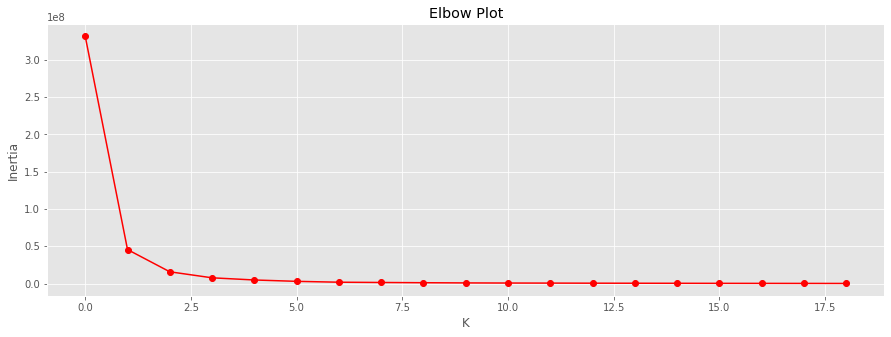

In [147]:
hyd_hood_venue=hyd_loc_df.groupby('neighborhood',as_index=False)[['latitude','longitude']+list(hyd_loc_df.columns[11:])].sum()

train_col=list(hyd_hood_venue.columns[1:])
X_train=hyd_hood_venue[train_col]
X_train_scaled=StandardScaler().fit_transform(X_train)

plt.style.use('ggplot')
iner=[]
for k in range(1,20) :
    clus=KMeans(k,n_init=15)
    clus.fit(X_train)
    iner.append(clus.inertia_)

plt.figure(figsize=(15,5))
plt.plot(iner[:],'ro-')
plt.title('Elbow Plot')
plt.ylabel('Inertia')
plt.xlabel('K')

#### From the above plot we can confidently select 4 or 5 clusters, lets select 5

Text(0.5, 0, 'PC1')

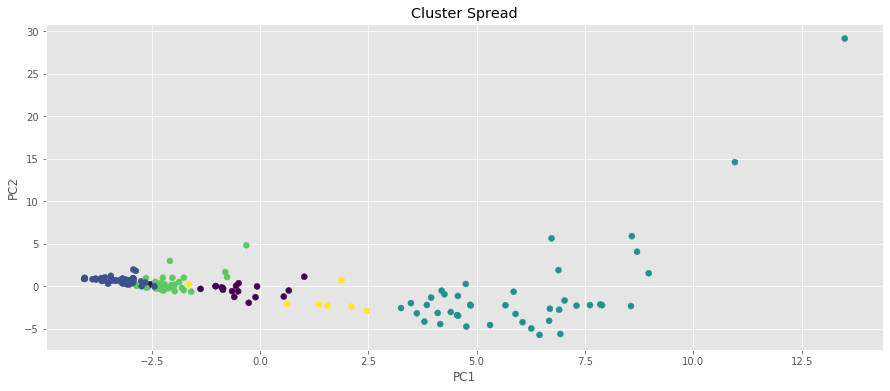

In [149]:
clus=KMeans(5,n_init=15)
clus.fit(X_train)

X_train_PC=PCA(2).fit_transform(X_train_scaled)

plt.figure(figsize=(15,6))
plt.scatter(X_train_PC[:,0],X_train_PC[:,1],c=clus.labels_)
plt.title('Cluster Spread')
plt.ylabel('PC2')
plt.xlabel('PC1')

Text(0.5, 0, 'PC3')

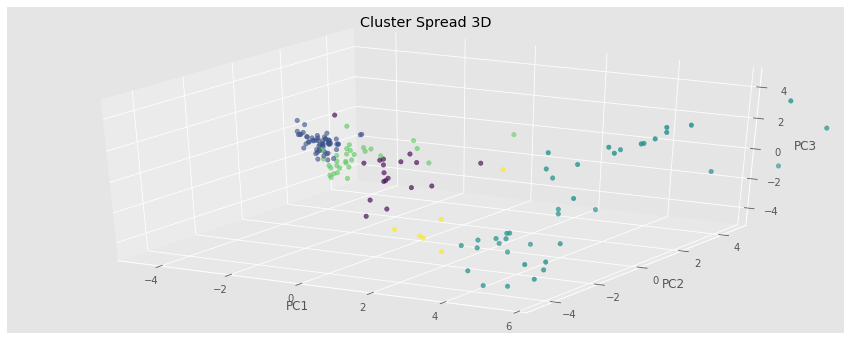

In [150]:

from mpl_toolkits.mplot3d import Axes3D

X_train_PC=PCA(3).fit_transform(X_train_scaled)

fig = plt.figure(figsize=(15,6))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X_train_PC[:,0],X_train_PC[:,1], X_train_PC[:,2],c=clus.labels_, depthshade=True)
ax.set_xlim([-5,6])
ax.set_ylim([-5,5])
ax.set_zlim([-5,5])
ax.set_title('Cluster Spread 3D')
ax.set_ylabel('PC2')
ax.set_xlabel('PC1')
ax.set_zlabel('PC3')

Text(0.5, 0, 'Cluster')

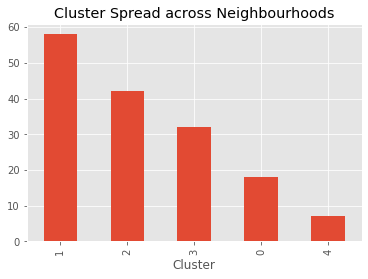

In [151]:
hyd_hood_venue['Cluster']=clus.labels_

clus_dict=dict()
for each in hyd_hood_venue[['neighborhood','Cluster']].values :
    clus_dict[each[0]]=each[1]

hyd_hood_venue['Cluster'].value_counts().plot(kind='bar')
plt.title('Cluster Spread across Neighbourhoods')
plt.xlabel('Cluster')

In [152]:
hyd_clus=hyd_hood_venue[['neighborhood','Cluster']]
hyd_clus['latitude']=hyd_hood_venue['neighborhood'].map(lambda nei : hyd_loc_df[hyd_loc_df['neighborhood']==nei]['latitude'].mean())
hyd_clus['longitude']=hyd_hood_venue['neighborhood'].map(lambda nei : hyd_loc_df[hyd_loc_df['neighborhood']==nei]['longitude'].mean())

hyd_clus.sample(5)

neighborhood  Cluster   latitude  longitude
17     balkampet        2  17.446923  78.450451
27     borabanda        3  17.451670  78.415421
7          alwal        1  17.502229  78.508858
154    yakutpura        3  17.358628  78.485805
78    kushaiguda        1  17.482545  78.572644

#### Spatial Cluster plot created after clustering the neighbourhoods using venue related data.

In [160]:
map_clusters = folium.Map(location=[hyd_lat, hyd_lon], zoom_start=11,tiles='Stamen Terrain')
folium.CircleMarker([hyd_lat, hyd_lon],radius=10,popup='Hyderabad',fill_color='blue',fill_opacity=5,parse_html=True).add_to(map_clusters)
# 5 colors for 5 clusters
x = np.arange(5)
ys = [i + x + (i*x)**2 for i in range(5)]
colors_array = cm.inferno(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]
for poi,cluster,lat,lon in hyd_clus.values:
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker([lat, lon],radius=2.5,popup=label,color=rainbow[int(cluster-1)],\
                        fill=True,fill_color=rainbow[int(cluster-1)],fill_opacity=1).add_to(map_clusters)
map_clusters

### Few of the observations after clustering are 
#### 1) There is a pattern in how the clusters were grouped, the clusters has spread from center to outside of the city in a layered fashion.
#### 2) Its interesting to see that neighbourhoods of Old city away from City central were grouped  into a cluster also neighbourhoods away from the center were grouped into a cluster.
#### 3) Though geographically near, neighbourhoods got clustered depending on the kind of venues they have.


#### Neighbourhoods in each Cluster

In [206]:
hyd_loc_df['Cluster']=hyd_loc_df['neighborhood'].map(clus_dict)
cluster_analysis_df=hyd_loc_df.groupby(['Cluster','venue_cat_name'],as_index=False)['neighborhood'].count()
cluster_analysis_df.sort_values(['Cluster','neighborhood'],ascending=[True,False],inplace=True)
cluster_analysis_df.reset_index(drop=True,inplace=True)
grouped_df=cluster_analysis_df.groupby('Cluster',as_index=False,group_keys=False).apply(lambda t : t.head(10))

for i in range(5) :
    
    print('Cluster {} : \n'.format(i+1))
    print(grouped_df[grouped_df['Cluster']==i])
    print('\n')
    print(hyd_hood_venue.loc[hyd_hood_venue['Cluster']==i,'neighborhood'].values)
    print('\n')

Cluster 1 : 

   Cluster        venue_cat_name  neighborhood
0        0     Indian Restaurant            66
1        0                  Café            22
2        0           Coffee Shop            22
3        0                Bakery            21
4        0  Fast Food Restaurant            17
5        0            Restaurant            15
6        0    Chinese Restaurant            13
7        0         Movie Theater            13
8        0        Ice Cream Shop            12
9        0           Pizza Place            12


['adikmet' 'begum bazaar' 'chilkalguda' 'dar-ul-shifa' 'erragadda'
 'gautham nagar' 'golnaka' 'gudimalkapur' 'habsiguda' 'hafeezpet'
 'kakatiya nagar' 'musheerabad' 'padmanabha nagar colony' 'padmarao nagar'
 'parsigutta' 'sikh village' 'sitaphalmandi' 'tarnaka']


Cluster 2 : 

    Cluster        venue_cat_name  neighborhood
80        1     Indian Restaurant            38
81        1         Train Station            21
82        1                  Café          

#### After doing the analysis its evident that Hyderabad has high density of food related venues, they are everywhere 
#### For someone who wants to start a food related business it would be great for them to open their restaurant in above mentioned cluster 3 neighbourhoods like Gachibowli, Hitech City, Jubilee hills, Film nagar.
#### For others who are quite not sure they can start a Hotel in Cluster 3 or Cluster 4 neighbourhoods, or they can even start restaurants inplaces where they are scarce like in cluster 5 neighbourhoods
#### Since the food related venues are ubiquitous, its better to think about other businesses like super markets, theatres, small scale markets etc. 

#### Next Steps : We can try to get the population data per neighbourhood and do further analysis to understand the ustomer base for each kind of business.